#                         Knight Predictor
###  Tools and Techniques in Data Science -- MS Data Science - 2018
### Supervised Learning
## Final Project: Predicting Responce

Welcome to the final project of Tools & Techniques of Data Science! The goal of the final project is to predict the responce of the customer provided the telecom data. In this notebook, various techniques has been implemented covered during throughout the course.
Based on the cross validation(K-fold) and evaluation criteria (Learning Curves, Variance Scores, Accuracy, Precision, F-Score, ROC-Curves, MSE), the best model is being used to predict the responce in MNP_Scoring Data which is being submitted as the final output.

## Lets Start!


## Exploring the Data


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("MNP_Training.csv")

# Success - Display the first record
display(data.head(n=5))

,U_ID,target_flag,M1_U_OB_DAY_VC_CC_CNT_T6,M1_U_OB_VC_CC_CNT_T6,M1_U_OB_VC_DUR_T6,M1_U_OB_VC_REV_T6,M1_U_OB_DAY_VC_CNT_T6,M1_U_OB_DAY_VC_DUR_T6,M1_U_OB_DAY_VC_REV_T6,M1_U_OB_EVN_VC_CNT_T6,...,M3_CST,M1_ARPU,M1_GPRS_REV,M1_GPRS_VOL,M2_ARPU,M2_GPRS_REV,M2_GPRS_VOL,M3_ARPU,M3_GPRS_REV,M3_GPRS_VOL
0,1001,0,3,6,9.5,9.859,3,6.5,0.448,3,...,5.10,0.000000,11.3093,58836,0.000000,4.5052,59134,0.000000,0.0000,38693
1,1002,1,100,125,716.0,21.060,201,613.0,21.060,80,...,2.94,571.827500,6.7500,2428046,1199.007258,88.7352,3970867,311.635592,0.8898,3006667
2,1003,1,43,64,236.0,151.774,58,185.0,107.111,30,...,5.31,248.119795,0.0000,0,312.181960,0.0000,0,262.756525,0.0000,0
3,1004,0,0,2,3.0,6.901,0,0.0,0.000,3,...,5.41,0.000000,0.0000,0,0.000000,0.0000,0,0.000000,0.0000,0
4,1005,0,3,4,6.0,15.086,4,4.0,10.157,1,...,4.06,0.000000,9.4500,8,0.000000,10.8000,9,0.000000,1.3500,1


####  Data Shape


In [2]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Total number of records
n_features = data.shape[1]

# Print the results
print ("number of records: {}".format(n_records))
print ("number of records: {}".format(n_features))

number of records: 19000
number of records: 899


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

In [3]:
new_data = data.drop(columns=["U_ID"])

# Split the data into features and target label
Y_MNP_training = new_data['target_flag']
X_Raw_MNP_training = new_data.drop('target_flag', axis = 1)


#### COMPUTING SUMMARY STATISTICS

In [4]:
summary_statistics = new_data.describe()
summary_statistics.loc["Var"] = new_data.var()
summary_statistics.loc["Type"] = new_data.dtypes
summary_statistics = summary_statistics.transpose()
summary_statistics.sort_values(by = "Var").head(10)

,count,mean,std,min,25%,50%,75%,max,Var,Type
M1_U_RBT_USSD_CNT_T6,19000,0,0,0,0,0,0,0,0,int64
M2_U_OB_VC_Aghanistan_CNT_T6,19000,0,0,0,0,0,0,0,0,int64
M2_U_OB_VC_CHINA_DUR_T6,19000,0,0,0,0,0,0,0,0,int64
M2_U_OB_VC_CHINA_CNT_T6,19000,0,0,0,0,0,0,0,0,int64
M1_U_OB_FNF_SMS_CNT_T6,19000,0,0,0,0,0,0,0,0,int64
M1_U_OB_FNF_SMS_REV_T6,19000,0,0,0,0,0,0,0,0,int64
M2_U_OB_VC_KUWAIT_DUR_T6,19000,0,0,0,0,0,0,0,0,int64
M2_U_OB_VC_KUWAIT_CNT_T6,19000,0,0,0,0,0,0,0,0,int64
M2_U_OB_VC_OMAN_DUR_T6,19000,0,0,0,0,0,0,0,0,int64
M2_U_OB_VC_Aghanistan_DUR_T6,19000,0,0,0,0,0,0,0,0,int64


####  IMPUTING MISSING VALUES¶

In [5]:
nullValues = X_Raw_MNP_training.isna().sum()

columns_with_null = list(nullValues[nullValues > 0].index)
print("\nColumns Containing Missing Values = " + str(len(columns_with_null)) + "\n")
print("\n".join(columns_with_null))

print("Imputing missing values with Median \n")
new_data_imputed = X_Raw_MNP_training
new_data_imputed.fillna(new_data_imputed.median(), inplace=True)

shape = tuple(new_data_imputed.shape)
print ("Rows in the Imputed Dataset - " + str(shape[0]))
print ("Coilumns in the Imputed Dataset - " + str(shape[1]))


Columns Containing Missing Values = 0


Imputing missing values with Median 

Rows in the Imputed Dataset - 19000
Coilumns in the Imputed Dataset - 897


## Feature Engineering

Removing Features having more than 90% 0 values

In [6]:
vars_with_missing = []

for f in new_data_imputed.columns:
    missings = new_data_imputed[new_data_imputed[f] == 0][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/new_data_imputed.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with zero values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with zero values'.format(len(vars_with_missing)))




Variable M1_U_OB_DAY_VC_CC_CNT_T6 has 7334 records (38.60%) with zero values
Variable M1_U_OB_VC_CC_CNT_T6 has 6640 records (34.95%) with zero values
Variable M1_U_OB_VC_DUR_T6 has 6640 records (34.95%) with zero values
Variable M1_U_OB_VC_REV_T6 has 7132 records (37.54%) with zero values
Variable M1_U_OB_DAY_VC_CNT_T6 has 7334 records (38.60%) with zero values
Variable M1_U_OB_DAY_VC_DUR_T6 has 7334 records (38.60%) with zero values
Variable M1_U_OB_DAY_VC_REV_T6 has 7894 records (41.55%) with zero values
Variable M1_U_OB_EVN_VC_CNT_T6 has 7931 records (41.74%) with zero values
Variable M1_U_OB_EVN_VC_CC_CNT_T6 has 7931 records (41.74%) with zero values
Variable M1_U_OB_EVN_VC_DUR_T6 has 7931 records (41.74%) with zero values
Variable M1_U_OB_EVN_VC_REV_T6 has 8530 records (44.89%) with zero values
Variable M1_U_OB_NGT_VC_CNT_T6 has 11683 records (61.49%) with zero values
Variable M1_U_OB_NGT_VC_CC_CNT_T6 has 11683 records (61.49%) with zero values
Variable M1_U_OB_NGT_VC_DUR_T6 has 1

Variable M1_U_OB_hybd_H_VC_DUR_T6 has 16159 records (85.05%) with zero values
Variable M1_U_OB_hybd_W_VC_CNT_T6 has 14870 records (78.26%) with zero values
Variable M1_U_OB_hybd_W_VC_CC_CNT_T6 has 14870 records (78.26%) with zero values
Variable M1_U_OB_hybd_W_VC_DUR_T6 has 14870 records (78.26%) with zero values
Variable M1_U_OB_HYBD_INT_VC_CNT_T6 has 19000 records (100.00%) with zero values
Variable M1_U_OB_HYBD_INT_VC_CC_CNT_T6 has 19000 records (100.00%) with zero values
Variable M1_U_OB_HYBD_INT_VC_DUR_T6 has 19000 records (100.00%) with zero values
Variable M1_U_OB_VC_Spillover_REV_T6 has 11965 records (62.97%) with zero values
Variable M1_U_OB_SMS_FREE_CNT_T6 has 15456 records (81.35%) with zero values
Variable M1_U_OB_SMS_PAID_CNT_T6 has 14422 records (75.91%) with zero values
Variable M1_U_OB_SMS_PAID_REV_T6 has 14422 records (75.91%) with zero values
Variable M1_U_OB_SMS_CNT_T6 has 12642 records (66.54%) with zero values
Variable M1_U_OB_SMS_REV_T6 has 14422 records (75.91%) 

Variable M1_U_OB_VC_INDIA_CNT_T6 has 19000 records (100.00%) with zero values
Variable M1_U_OB_VC_INDIA_DUR_T6 has 19000 records (100.00%) with zero values
Variable M1_U_OB_VC_MALAYSIA_CNT_T6 has 18978 records (99.88%) with zero values
Variable M1_U_OB_VC_MALAYSIA_DUR_T6 has 18978 records (99.88%) with zero values
Variable M1_U_OB_VC_SAUDIA_CNT_T6 has 18754 records (98.71%) with zero values
Variable M1_U_OB_VC_SAUDIA_DUR_T6 has 18754 records (98.71%) with zero values
Variable M1_U_OB_VC_SPAIN_CNT_T6 has 18994 records (99.97%) with zero values
Variable M1_U_OB_VC_SPAIN_DUR_T6 has 18994 records (99.97%) with zero values
Variable M1_U_OB_VC_UAE_CNT_T6 has 18893 records (99.44%) with zero values
Variable M1_U_OB_VC_UAE_DUR_T6 has 18893 records (99.44%) with zero values
Variable M1_U_OB_VC_UK_CNT_T6 has 18967 records (99.83%) with zero values
Variable M1_U_OB_VC_UK_DUR_T6 has 18967 records (99.83%) with zero values
Variable M1_U_OB_VC_USA_CNT_T6 has 18976 records (99.87%) with zero values
V

Variable M2_U_OB_OFNT_ZNG_VC_REV_T6 has 15276 records (80.40%) with zero values
Variable M2_U_OB_OFNT_int_VC_CNT_T6 has 18438 records (97.04%) with zero values
Variable M2_U_OB_OFNT_INT_VC_CC_CNT_T6 has 18438 records (97.04%) with zero values
Variable M2_U_OB_OFNT_INT_VC_DUR_T6 has 18438 records (97.04%) with zero values
Variable M2_U_OB_OFNT_INT_VC_REV_T6 has 18438 records (97.04%) with zero values
Variable M2_U_OB_OFNT_DAY_VC_CNT_T6 has 11669 records (61.42%) with zero values
Variable M2_U_OB_OFNT_DAY_VC_CC_CNT_T6 has 11669 records (61.42%) with zero values
Variable M2_U_OB_OFNT_DAY_VC_DUR_T6 has 11669 records (61.42%) with zero values
Variable M2_U_OB_OFNT_DAY_VC_REV_T6 has 12388 records (65.20%) with zero values
Variable M2_U_OB_OFNT_EVN_VC_CNT_T6 has 12583 records (66.23%) with zero values
Variable M2_U_OB_OFNT_EVN_VC_CC_CNT_T6 has 12583 records (66.23%) with zero values
Variable M2_U_OB_OFNT_EVN_VC_DUR_T6 has 12583 records (66.23%) with zero values
Variable M2_U_OB_OFNT_EVN_VC_RE

Variable M2_U_VAS_FRNDS_REV_T6 has 18997 records (99.98%) with zero values
Variable M2_U_VAS_INFO_SVC_CNT_T6 has 18986 records (99.93%) with zero values
Variable M2_U_VAS_INFO_SVC_REV_T6 has 18986 records (99.93%) with zero values
Variable M2_U_VAS_INTERNET_BAL_INQ_CNT_T6 has 16962 records (89.27%) with zero values
Variable M2_U_VAS_INTERNET_BAL_INQ_REV_T6 has 16972 records (89.33%) with zero values
Variable M2_U_VAS_ISLMC_CNT_T6 has 18925 records (99.61%) with zero values
Variable M2_U_VAS_ISLMC_REV_T6 has 18994 records (99.97%) with zero values
Variable M2_U_VAS_IVR_VC_CNT_T6 has 17329 records (91.21%) with zero values
Variable M2_U_VAS_IVR_VC_DUR_T6 has 17329 records (91.21%) with zero values
Variable M2_U_VAS_IVR_VC_REV_T6 has 18204 records (95.81%) with zero values
Variable M2_U_VAS_MATH_IQ_CNT_T6 has 18964 records (99.81%) with zero values
Variable M2_U_VAS_MATH_IQ_REV_T6 has 18964 records (99.81%) with zero values
Variable M2_U_VAS_MCA_CNT_T6 has 18860 records (99.26%) with zero

Variable M3_U_OB_W_VC_CC_CNT_T6 has 8665 records (45.61%) with zero values
Variable M3_U_OB_W_VC_DUR_T6 has 8665 records (45.61%) with zero values
Variable M3_U_OB_W_VC_REV_T6 has 9217 records (48.51%) with zero values
Variable M3_U_OB_FNF_VC_CNT_T6 has 18354 records (96.60%) with zero values
Variable M3_U_OB_FNF_VC_CC_CNT_T6 has 18354 records (96.60%) with zero values
Variable M3_U_OB_FNF_VC_DUR_T6 has 18354 records (96.60%) with zero values
Variable M3_U_OB_FNF_VC_REV_T6 has 18404 records (96.86%) with zero values
Variable M3_U_OB_ONT_VC_CC_CNT_T6 has 9009 records (47.42%) with zero values
Variable M3_U_OB_ONT_VC_DUR_T6 has 9009 records (47.42%) with zero values
Variable M3_U_OB_ONT_VC_REV_T6 has 9654 records (50.81%) with zero values
Variable M3_U_OB_ONT_VC_CNT_T6 has 9009 records (47.42%) with zero values
Variable M3_U_OB_ONT_DAY_VC_CC_CNT_T6 has 9524 records (50.13%) with zero values
Variable M3_U_OB_ONT_DAY_VC_DUR_T6 has 9524 records (50.13%) with zero values
Variable M3_U_OB_ONT

Variable M3_U_OB_ONT_SMS_REV_T6 has 16528 records (86.99%) with zero values
Variable M3_U_OB_OFNT_SMS_CNT_T6 has 14859 records (78.21%) with zero values
Variable M3_U_OB_OFNT_SMS_REV_T6 has 16865 records (88.76%) with zero values
Variable M3_U_OB_FNF_SMS_CNT_T6 has 19000 records (100.00%) with zero values
Variable M3_U_OB_FNF_SMS_REV_T6 has 19000 records (100.00%) with zero values
Variable M3_U_OB_HYBD_SMS_CNT_T6 has 17856 records (93.98%) with zero values
Variable M3_U_OB_HYBD_day_SMS_CNT_T6 has 17999 records (94.73%) with zero values
Variable M3_U_OB_HYBD_EVN_SMS_CNT_T6 has 17973 records (94.59%) with zero values
Variable M3_U_OB_HYBD_NGT_SMS_CNT_T6 has 18340 records (96.53%) with zero values
Variable M3_U_OB_HYBD_H_SMS_CNT_T6 has 18129 records (95.42%) with zero values
Variable M3_U_OB_HYBD_W_SMS_CNT_T6 has 17920 records (94.32%) with zero values
Variable M3_U_OB_MMS_CNT_T6 has 18985 records (99.92%) with zero values
Variable M3_U_RBT_CNT_T6 has 18801 records (98.95%) with zero valu

Variable M3_U_OB_VC_Norway_CNT_T6 has 18999 records (99.99%) with zero values
Variable M3_U_OB_VC_Norway_DUR_T6 has 18999 records (99.99%) with zero values
Variable M3_U_OB_VC_Qatar_CNT_T6 has 18993 records (99.96%) with zero values
Variable M3_U_OB_VC_Qatar_DUR_T6 has 18993 records (99.96%) with zero values
Variable M3_U_OB_VC_CHINA_CNT_T6 has 19000 records (100.00%) with zero values
Variable M3_U_OB_VC_CHINA_DUR_T6 has 19000 records (100.00%) with zero values
Variable M3_U_OB_VC_Turkey_CNT_T6 has 19000 records (100.00%) with zero values
Variable M3_U_OB_VC_Turkey_DUR_T6 has 19000 records (100.00%) with zero values
Variable M3_U_OB_VC_Aghanistan_CNT_T6 has 19000 records (100.00%) with zero values
Variable M3_U_OB_VC_Aghanistan_DUR_T6 has 19000 records (100.00%) with zero values
Variable M3_U_OB_VC_Iran_CNT_T6 has 18994 records (99.97%) with zero values
Variable M3_U_OB_VC_Iran_DUR_T6 has 18994 records (99.97%) with zero values
Variable M1_RECH_AMT has 5627 records (29.62%) with zero v

Variable M3_RECH_500_750_AMT has 18830 records (99.11%) with zero values
Variable M3_RECH_500_750_CNT has 18830 records (99.11%) with zero values
Variable M3_RECH_750_1000_AMT has 18990 records (99.95%) with zero values
Variable M3_RECH_750_1000_CNT has 18990 records (99.95%) with zero values
Variable M3_RECH_GT_1000_AMT has 18942 records (99.69%) with zero values
Variable M3_RECH_GT_1000_CNT has 18942 records (99.69%) with zero values
Variable M3_SMARTSHARE_AMT has 18842 records (99.17%) with zero values
Variable M3_SMARTSHARE_CNT has 18842 records (99.17%) with zero values
Variable M3_LOAN_AMT has 11947 records (62.88%) with zero values
Variable M3_LOAN_CNT has 11947 records (62.88%) with zero values
Variable M3_DATA_LOAN_AMT has 19000 records (100.00%) with zero values
Variable M3_DATA_LOAN_CNT has 18684 records (98.34%) with zero values
Variable M3_EC350_RECH_AMT has 18573 records (97.75%) with zero values
Variable M3_EC350_RECH_CNT has 18573 records (97.75%) with zero values
Varia

In [7]:
vars_with_missing = []

for f in new_data_imputed.columns:
    missings = new_data_imputed[new_data_imputed[f] == 0][f].count()
    if missings > 0:
        missings_perc = missings/new_data_imputed.shape[0]
        if(missings_perc > 0.9):      # 90%
          vars_with_missing.append(f)
         
        
        
print('In total, there are {} variables with above 90% zero percentage values'.format(len(vars_with_missing)))
newdata = new_data_imputed.drop(vars_with_missing, axis=1)
newdata.info()


In total, there are 463 variables with above 90% zero percentage values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Columns: 434 entries, M1_U_OB_DAY_VC_CC_CNT_T6 to M3_GPRS_VOL
dtypes: float64(189), int64(245)
memory usage: 62.9 MB


### Test Train Split

In [8]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'responce' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newdata, Y_MNP_training, test_size = 0.2, random_state = 0)

# Show the results of the split
print ("Train set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Train set has 15200 samples.
Testing set has 3800 samples.


C:\Users\Saba\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Feature Transformation

Feature transformation is done seperately on X_train and X_test to avoid any biasness in the predictive power of the predictor.

### Feature Transformation on X_train

For feature transformation MinMaxScaler is used

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_names = list(X_train.columns)
X_train[col_names] = scaler.fit_transform(X_train[col_names])
print("\nImputed and MIX Max Tranformation Variable Summary")
X_train.describe().transpose().head(10)

C:\Users\Saba\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Saba\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Imputed and MIX Max Tranformation Variable Summary


,count,mean,std,min,25%,50%,75%,max
M1_U_OB_DAY_VC_CC_CNT_T6,15200.0,0.038224,0.079767,0.0,0.0,0.005226,0.036585,1.0
M1_U_OB_VC_CC_CNT_T6,15200.0,0.046285,0.091934,0.0,0.0,0.006693,0.046854,1.0
M1_U_OB_VC_DUR_T6,15200.0,0.015756,0.042669,0.0,0.0,0.000972,0.011415,1.0
M1_U_OB_VC_REV_T6,15200.0,0.022713,0.050905,0.0,0.0,0.004609,0.025205,1.0
M1_U_OB_DAY_VC_CNT_T6,15200.0,0.037270,0.083173,0.0,0.0,0.004306,0.032293,1.0
M1_U_OB_DAY_VC_DUR_T6,15200.0,0.018041,0.049133,0.0,0.0,0.000906,0.013041,1.0
M1_U_OB_DAY_VC_REV_T6,15200.0,0.017863,0.041783,0.0,0.0,0.002924,0.018612,1.0
M1_U_OB_EVN_VC_CNT_T6,15200.0,0.035676,0.077769,0.0,0.0,0.003236,0.032362,1.0
M1_U_OB_EVN_VC_CC_CNT_T6,15200.0,0.045617,0.092895,0.0,0.0,0.006135,0.042945,1.0
M1_U_OB_EVN_VC_DUR_T6,15200.0,0.018204,0.051650,0.0,0.0,0.000675,0.011591,1.0


### Feature Transformation on X_test

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_names = list(X_test.columns)
X_test[col_names] = scaler.fit_transform(X_test[col_names])
print("\nImputed and MIX Max Tranformation Variable Summary")
X_test.describe().transpose().head(10)

C:\Users\Saba\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Saba\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Imputed and MIX Max Tranformation Variable Summary


,count,mean,std,min,25%,50%,75%,max
M1_U_OB_DAY_VC_CC_CNT_T6,3800.0,0.042208,0.090056,0.0,0.0,0.005671,0.039698,1.0
M1_U_OB_VC_CC_CNT_T6,3800.0,0.049574,0.100899,0.0,0.0,0.007143,0.047143,1.0
M1_U_OB_VC_DUR_T6,3800.0,0.035514,0.092152,0.0,0.0,0.002177,0.025313,1.0
M1_U_OB_VC_REV_T6,3800.0,0.034093,0.070667,0.0,0.0,0.007333,0.038289,1.0
M1_U_OB_DAY_VC_CNT_T6,3800.0,0.038665,0.088797,0.0,0.0,0.004376,0.032823,1.0
M1_U_OB_DAY_VC_DUR_T6,3800.0,0.024123,0.066247,0.0,0.0,0.001284,0.016569,1.0
M1_U_OB_DAY_VC_REV_T6,3800.0,0.031101,0.067224,0.0,0.0,0.005411,0.033971,1.0
M1_U_OB_EVN_VC_CNT_T6,3800.0,0.038442,0.085794,0.0,0.0,0.003521,0.032130,1.0
M1_U_OB_EVN_VC_CC_CNT_T6,3800.0,0.043156,0.090087,0.0,0.0,0.005848,0.040936,1.0
M1_U_OB_EVN_VC_DUR_T6,3800.0,0.033162,0.088852,0.0,0.0,0.001251,0.021685,1.0


## Feature Selection

For feature selection, RandomForestClassifier is used

### Feature Selection on training set

In [11]:
from sklearn.ensemble import RandomForestClassifier


feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(newdata.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))


 1) M1_ARPU                        0.148884
 2) M2_ARPU                        0.078542
 3) M1_U_VAS_PRM_SMS_REV_T6        0.078106
 4) M3_ARPU                        0.068045
 5) M1_U_VAS_PRM_SMS_CNT_T6        0.067843
 6) M1_U_VAS_REV_T6                0.030416
 7) M3_OG_CALLS                    0.022741
 8) M1_OCQ                         0.021692
 9) M1_OG_CALLS                    0.019890
10) M3_OCQ                         0.017308
11) M3_CST                         0.016099
12) M1_CST                         0.016046
13) M2_OCQ                         0.015754
14) M2_CST                         0.015321
15) M2_OG_CALLS                    0.015286
16) M1_U_VAS_CNT_T6                0.009475
17) M1_RECH_AMT                    0.009268
18) M1_U_OB_ONT_VC_CC_CNT_T6       0.008584
19) M1_U_OB_ONT_VC_CNT_T6          0.008203
20) M1_RECH_CNT                    0.007667
21) M1_RECH_EASYLOAD_AMT           0.007536
22) M1_U_OB_ONT_VC_DUR_T6          0.007015
23) M1_RECH_EASYLOAD_CNT        

###### A total of 217 feature is selected for Model Training from 434 shortlisted features after removing 90% zeroes (initially a set of 897)

In [12]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])


Number of features before selection: 434
Number of features after selection: 217


In [13]:
X_train = X_train[selected_vars]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15200 entries, 16435 to 2732
Columns: 217 entries, M1_U_OB_DAY_VC_CC_CNT_T6 to M3_GPRS_VOL
dtypes: float64(217)
memory usage: 25.3 MB


### Feature selection in X_train selected from X_train

In [14]:
X_test = X_test[selected_vars]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 4674 to 18562
Columns: 217 entries, M1_U_OB_DAY_VC_CC_CNT_T6 to M3_GPRS_VOL
dtypes: float64(217)
memory usage: 6.3 MB


### PCA for selected features transformation for improving predictive power

In [15]:
from sklearn.decomposition import PCA

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

In [16]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([4.59669022e-01, 1.43962664e-01, 6.65211734e-02, 5.27419010e-02,
       3.96804401e-02, 2.59072202e-02, 2.27057386e-02, 2.17566592e-02,
       1.64350514e-02, 1.43937436e-02, 9.83246606e-03, 9.37891092e-03,
       9.09575515e-03, 7.64260026e-03, 6.43853555e-03, 5.89802737e-03,
       5.23056658e-03, 4.99458502e-03, 4.23633069e-03, 3.99707801e-03,
       3.70114998e-03, 3.43856497e-03, 3.33982133e-03, 3.15761667e-03,
       2.83383234e-03, 2.50553031e-03, 2.20766069e-03, 2.17644563e-03,
       2.05588734e-03, 1.97175445e-03, 1.88700779e-03, 1.83872922e-03,
       1.65548450e-03, 1.52161748e-03, 1.50574504e-03, 1.45039211e-03,
       1.31071903e-03, 1.30711235e-03, 1.26090916e-03, 1.22801659e-03,
       1.18244568e-03, 1.16570776e-03, 1.11921357e-03, 1.04203515e-03,
       9.54169352e-04, 9.14225377e-04, 8.04279841e-04, 7.63174628e-04,
       7.47304136e-04, 7.12112213e-04, 6.63658321e-04, 6.33730622e-04,
       6.12110574e-04, 5.93232230e-04, 5.71236423e-04, 5.50001852e-04,
      

## Running Various Classifiers 

Various Classifiers are tested with default settings to shortlist the best candidates.
Different algorithms are explored but the criteria for finalising the best includes variance score, precision, f-score, learning curves, K-fold cross validation and ROC-Curves.

1. Logistic Regression
2. SVM-SVC (Kernal = Linear)
3. SVM-SVC (Kernal = rgb)
4. SVM-SVC (Kernal = poly)
5. NUSVC - kernel - linear
6. LinearSVC
7. KNN 
8. RandomForest
9. XGBoost

### Logistic Regression



Fitting - Logistic Regression Model

Test Data - Accuracy
0.9060526315789473

Test Data - Confusion Matrix
[[2031  163]
 [ 194 1412]]

Test Data - SSE Matrix
0.09394736842105263


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.91      0.93      0.92      2194
          1       0.90      0.88      0.89      1606

avg / total       0.91      0.91      0.91      3800



Variance score: 0.61


=== All AUC Scores ===
[0.89612097 0.88757396 0.89480605 0.8816568  0.88815789 0.87894737
 0.87425938 0.88610928 0.87557604 0.88347597]

 ROC Curve


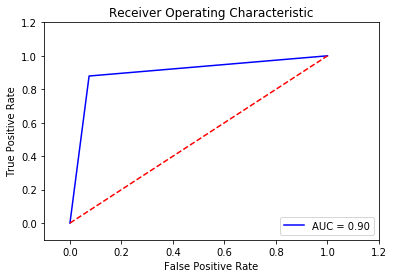

In [17]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


clf_A = LogisticRegression(random_state=101)
clf_A.fit(X_train,y_train)
clfA_predict = clf_A.predict(X_test)

# Model Performance Evaluation; K-fold Cross Validation
clfA_cv_score = cross_val_score(clf_A, X=X_train, y=y_train, cv=10)


print("\n\nFitting - Logistic Regression Model")
print("\nTest Data - Accuracy")
print(clf_A.score(X_test, y_test))
print("\nTest Data - Confusion Matrix")
print(metrics.confusion_matrix(y_test, clfA_predict))
print("\nTest Data - SSE Matrix")
print(mean_squared_error(y_test, clf_A.predict(X_test)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, clf_A.predict(X_test)))
print('\n')
print('Variance score: %.2f' % r2_score(y_test, clf_A.predict(X_test)))
print('\n')
print("=== All AUC Scores ===")
print(clfA_cv_score)
print("\n ROC Curve")
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf_A.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Logistic Regression - Learning Curve


Automatically created module for IPython interactive environment


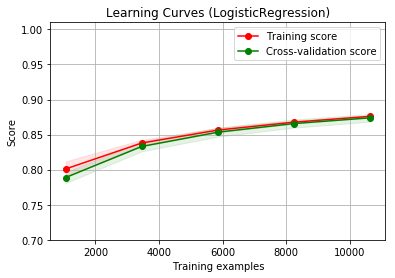

In [37]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression(random_state=101)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


### Linear SVC



Fitting - Linear SVC Model

Test Data - Accuracy
0.9465789473684211

Test Data - Confusion Matrix
[[2061  133]
 [  70 1536]]

Test Data - SSE Matrix
0.053421052631578946


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.97      0.94      0.95      2194
          1       0.92      0.96      0.94      1606

avg / total       0.95      0.95      0.95      3800



Variance score: 0.78


=== All AUC Scores ===
[0.93885602 0.93162393 0.93951348 0.93030901 0.93947368 0.92828947
 0.9361422  0.93482554 0.92955892 0.93877551]

 ROC Curve


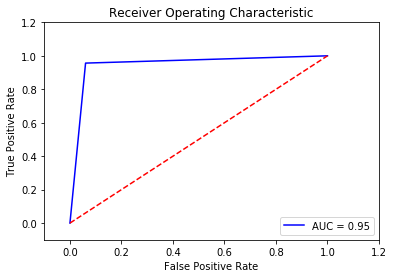

In [24]:
clf_B = LinearSVC(random_state=101)
clfB_model = clf_B.fit(X_train,y_train)

# Model Performance Evaluation; K-fold Cross Validation
clfB_cv_score = cross_val_score(clfB_model, X=X_train, y=y_train, cv=10)

print("\n\nFitting - Linear SVC Model")

print("\nTest Data - Accuracy")
print(clf_B.score(X_test, y_test))
print("\nTest Data - Confusion Matrix")
print(metrics.confusion_matrix(y_test, clf_B.predict(X_test)))
print("\nTest Data - SSE Matrix")
print(mean_squared_error(y_test, clf_B.predict(X_test)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, clf_B.predict(X_test)))
print('\n')
print('Variance score: %.2f' % r2_score(y_test, clf_B.predict(X_test)))
#plt.scatter(y_test,clf_B.predict(X_test))
print('\n')
print("=== All AUC Scores ===")
print(clfB_cv_score)
print("\n ROC Curve")
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf_B.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Linear SVC - Learning Curve

Automatically created module for IPython interactive environment


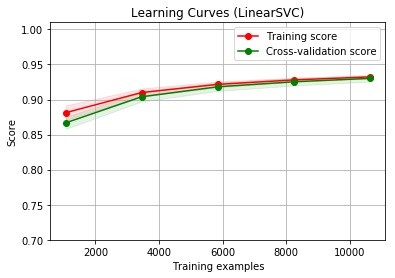

In [39]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (LinearSVC)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearSVC(random_state=101)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


## Testing SVM Classifiers 

Testing of various SVM classifiers to evaluate which has the more predictive power for the current data set.

1. SVM-SVC (Kernal = Linear)
2. SVM-SVC (Kernal = rgb)
3. SVM-SVC (Kernal = poly)
4. NUSVC - kernel - linear
5. LinearSVC

 #### Testing SVM Kernel = Default Settings

In [19]:
from sklearn import svm
from sklearn.svm import NuSVC
from sklearn.svm import SVC


svc     = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='poly').fit(X_train, y_train)
nu_svc  = svm.NuSVC(kernel='linear').fit(X_train, y_train)
lin_svc = svm.LinearSVC().fit(X_train, y_train)

print("\n\nFitting - kernel='linear'")

print("\nTest Data - Accuracy")
print(svc.score(X_test, y_test))
print("\nTest Data - Confusion Matrix")
print(metrics.confusion_matrix(y_test, svc.predict(X_test)))
print("\nTest Data - SSE Matrix")
print(mean_squared_error(y_test, svc.predict(X_test)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, svc.predict(X_test)))
print('\n')
print('Variance score: %.2f' % r2_score(y_test, svc.predict(X_test)))



print("\n\nFitting - kernel='poly'")

print("\nTest Data - Accuracy")
print(rbf_svc.score(X_test, y_test))
print("\nTest Data - Confusion Matrix")
print(metrics.confusion_matrix(y_test, rbf_svc.predict(X_test)))
print("\nTest Data - SSE Matrix")
print(mean_squared_error(y_test, rbf_svc.predict(X_test)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rbf_svc.predict(X_test)))
print('\n')
print('Variance score: %.2f' % r2_score(y_test, rbf_svc.predict(X_test)))


print("\n\nFitting - NUSVC - kernel - linear")

print("\nTest Data - Accuracy")
print(nu_svc.score(X_test, y_test))
print("\nTest Data - Confusion Matrix")
print(metrics.confusion_matrix(y_test, nu_svc.predict(X_test)))
print("\nTest Data - SSE Matrix")
print(mean_squared_error(y_test, nu_svc.predict(X_test)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, nu_svc.predict(X_test)))
print('\n')
print('Variance score: %.2f' % r2_score(y_test, nu_svc.predict(X_test)))


print("\n\nFitting - Linear SVC Model")

print("\nTest Data - Accuracy")
print(lin_svc.score(X_test, y_test))
print("\nTest Data - Confusion Matrix")
print(metrics.confusion_matrix(y_test, lin_svc.predict(X_test)))
print("\nTest Data - SSE Matrix")
print(mean_squared_error(y_test, lin_svc.predict(X_test)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, lin_svc.predict(X_test)))
print('\n')
print('Variance score: %.2f' % r2_score(y_test, lin_svc.predict(X_test)))





Fitting - kernel='linear'

Test Data - Accuracy
0.9478947368421052

Test Data - Confusion Matrix
[[2047  147]
 [  51 1555]]

Test Data - SSE Matrix
0.05210526315789474


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.98      0.93      0.95      2194
          1       0.91      0.97      0.94      1606

avg / total       0.95      0.95      0.95      3800



Variance score: 0.79


Fitting - kernel='poly'

Test Data - Accuracy
0.5773684210526315

Test Data - Confusion Matrix
[[2194    0]
 [1606    0]]

Test Data - SSE Matrix
0.4226315789473684


=== Classification Report ===


C:\Users\Saba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.58      1.00      0.73      2194
          1       0.00      0.00      0.00      1606

avg / total       0.33      0.58      0.42      3800



Variance score: -0.73


Fitting - NUSVC - kernel - linear

Test Data - Accuracy
0.8363157894736842

Test Data - Confusion Matrix
[[1956  238]
 [ 384 1222]]

Test Data - SSE Matrix
0.1636842105263158


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.84      0.89      0.86      2194
          1       0.84      0.76      0.80      1606

avg / total       0.84      0.84      0.84      3800



Variance score: 0.33


Fitting - Linear SVC Model

Test Data - Accuracy
0.9465789473684211

Test Data - Confusion Matrix
[[2061  133]
 [  70 1536]]

Test Data - SSE Matrix
0.053421052631578946


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.97      0.94      0.95      2194
   

### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier


# random forest model creation
rfc = RandomForestClassifier(random_state=101)
rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)

# Model Performance Evaluation; K-fold Cross Validation
rfc_cv_score = cross_val_score(rfc, X=X_train, y=y_train, cv=10)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())
print('Variance score: %.2f' % r2_score(y_test, rfc.predict(X_test)))



=== Confusion Matrix ===
[[1922  272]
 [ 522 1084]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.79      0.88      0.83      2194
          1       0.80      0.67      0.73      1606

avg / total       0.79      0.79      0.79      3800



=== All AUC Scores ===
[0.86324786 0.86061801 0.85667324 0.85141354 0.85328947 0.85328947
 0.84792627 0.85385122 0.85319289 0.87491771]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.856841969435628
Variance score: 0.14


#### Random Forest  Learning Curve


Automatically created module for IPython interactive environment


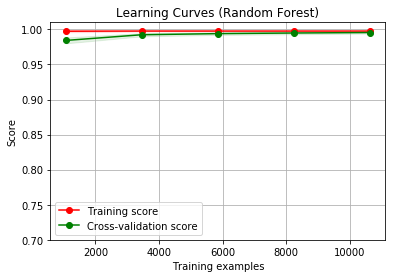

In [43]:


print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(random_state=101)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model Performance Evaluation; K-fold Cross Validation
knn_cv_score = cross_val_score(knn, X=X_train, y=y_train, cv=10)

print("\n\nFitting - KNN")

print("\nTest Data - Accuracy")
print(knn.score(X_test, y_test))
print("\nTest Data - Confusion Matrix")
print(metrics.confusion_matrix(y_test, knn.predict(X_test)))
print("\nTest Data - SSE Matrix")
print(mean_squared_error(y_test, knn.predict(X_test)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, knn.predict(X_test)))
print('\n')
print("=== All AUC Scores ===")
print(knn_cv_score)
print('Variance score: %.2f' % r2_score(y_test, knn.predict(X_test)))
#plt.scatter(y_test,clf_B.predict(X_test))
print('\n')



Fitting - KNN

Test Data - Accuracy
0.833421052631579

Test Data - Confusion Matrix
[[2006  188]
 [ 445 1161]]

Test Data - SSE Matrix
0.16657894736842105


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.82      0.91      0.86      2194
          1       0.86      0.72      0.79      1606

avg / total       0.84      0.83      0.83      3800



=== All AUC Scores ===
[0.86850756 0.86390533 0.86653517 0.85864563 0.86907895 0.85986842
 0.8321264  0.8676761  0.85516787 0.85516787]
Variance score: 0.32




#### KNN  Learning Curve


Automatically created module for IPython interactive environment


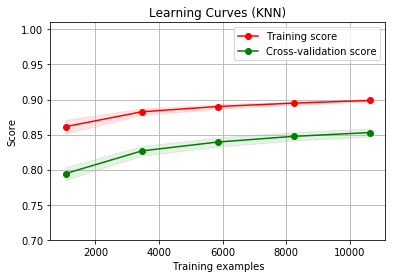

In [44]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


estimator = KNeighborsClassifier(n_neighbors=5)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


### XGBoost



Fitting - XGB

Test Data - Accuracy
0.8984210526315789

Test Data - Confusion Matrix
[[1940  254]
 [ 132 1474]]

Test Data - SSE Matrix
0.10157894736842105


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.94      0.88      0.91      2194
          1       0.85      0.92      0.88      1606

avg / total       0.90      0.90      0.90      3800





C:\Users\user\Anaconda3.5\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3.5\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3.5\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3.5\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

Variance score: 0.58




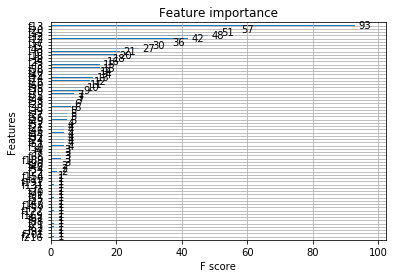

In [61]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot


# fit model no training data
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

print("\n\nFitting - XGB")

print("\nTest Data - Accuracy")
print(XGB.score(X_test, y_test))
print("\nTest Data - Confusion Matrix")
print(metrics.confusion_matrix(y_test, XGB.predict(X_test)))
print("\nTest Data - SSE Matrix")
print(mean_squared_error(y_test, XGB.predict(X_test)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, XGB.predict(X_test)))
print('\n')
print('Variance score: %.2f' % r2_score(y_test, XGB.predict(X_test)))
#plt.scatter(y_test,clf_B.predict(X_test))
print('\n')

# plot feature importance
plot_importance(XGB)
pyplot.show()

#### XGBoost  Learning Curve


Automatically created module for IPython interactive environment


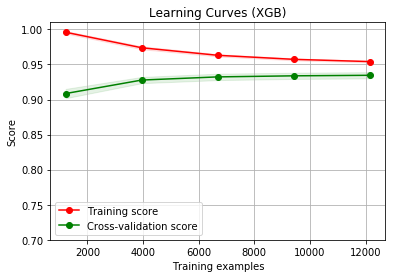

In [62]:


print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (XGB)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = XGBClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


# Top Two Shortlisted Winner Algorithms for Ensembling (Hyperparameter Tuning)

The top Winner algorithm for the current dataset are:
    1. SVM-SVC - Kernel = Linear (Variance Score = 0.79, f-score = 0.95)
    2. SVM - LinearSVC (Variance Score = 0.78, f-score = 0.95)
They both work in a different way resulting in different outputs, but LinearSVC is considered to be faster than 
SVC-kernal = Linear. Also, they come with different settings and parameters.

Hence, both of the algorithms are tuned with hyperparameter optimisation in order to select the one which is best for the current dataset.

## 1. SVM-SVC - 'Kernel = Linear'

#### Hyperparameter Tuning of SVC Kernel = "Linear"

In [29]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV



#Create a dictionary of possible parameters
params_grid = {'C': [1, 10, 100]}
svc = svm.SVC(kernel='linear')

#Create the GridSearchCV object
linearclf = GridSearchCV(svc, params_grid, cv = 5)

#Fit the data with the best possible parameters
linearclf.fit(X_train, y_train)

#Print the best estimator with it's parameters
linearclf.best_params_

{'C': 100}

# Evaluating Model Performance of SVC Kernel = "Linear"

In [24]:
from sklearn.svm import SVC
from sklearn import svm

svc = svm.SVC(kernel='linear', C = 100)
svc.fit(X_train, y_train)
print("\n\nFitting - kernel='linear'")

print("\nTest Data - Accuracy")
print(svc.score(X_test, y_test))
print("\nTest Data - Confusion Matrix")
print(metrics.confusion_matrix(y_test, svc.predict(X_test)))
print("\nTest Data - SSE Matrix")
print(mean_squared_error(y_test, svc.predict(X_test)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, svc.predict(X_test)))
print('\n')
print('Variance score: %.2f' % r2_score(y_test, svc.predict(X_test)))





Fitting - kernel='linear'

Test Data - Accuracy
0.9663157894736842

Test Data - Confusion Matrix
[[2106   88]
 [  40 1566]]

Test Data - SSE Matrix
0.03368421052631579


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      2194
          1       0.95      0.98      0.96      1606

avg / total       0.97      0.97      0.97      3800



Variance score: 0.86


### Learning Curve - SVC Kernel = Linear

Automatically created module for IPython interactive environment


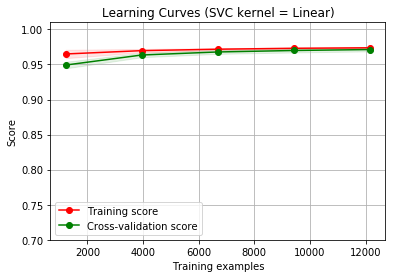

In [30]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (SVC kernel = Linear)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = svm.SVC(kernel='linear', C = 100)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


## 2. SVM - LinearSVC

#### Hyperparameter Tuning of LinearSVC

In [35]:

#Create a dictionary of possible parameters
params_grid = {'C': [1, 10, 100]}
est = LinearSVC()

#Create the GridSearchCV object
linearsvc = GridSearchCV(est, params_grid, cv = 5)

#Fit the data with the best possible parameters
linearsvc.fit(X_train, y_train)

#Print the best estimator with it's parameters
linearsvc.best_params_

#clf_LSVC = LinearSVC(C = new , penalty='l1', loss='squared_hinge', dual=False, tol=1e-3)


{'C': 100}

# Evaluating Model Performance of SVM - LinearSVC



Fitting - Linear SVC Model

Test Data - Accuracy
0.9642105263157895

Test Data - Confusion Matrix
[[2134   60]
 [  76 1530]]

Test Data - SSE Matrix
0.035789473684210524


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2194
          1       0.96      0.95      0.96      1606

avg / total       0.96      0.96      0.96      3800



Variance score: 0.85


=== All AUC Scores ===
[0.97172913 0.97764629 0.97698882 0.97830375 0.975      0.97105263
 0.97366689 0.97300856 0.97432521 0.98420013]

 ROC Curve


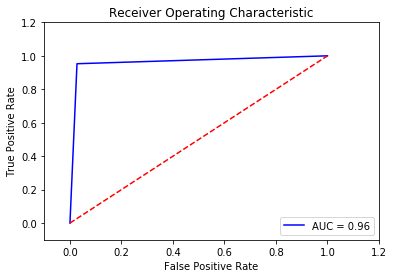

In [36]:
clf_B = LinearSVC(C = 100)
clfB_model = clf_B.fit(X_train,y_train)

# Model Performance Evaluation; K-fold Cross Validation
clfB_cv_score = cross_val_score(clfB_model, X=X_train, y=y_train, cv=10)

print("\n\nFitting - Linear SVC Model")

print("\nTest Data - Accuracy")
print(clf_B.score(X_test, y_test))
print("\nTest Data - Confusion Matrix")
print(metrics.confusion_matrix(y_test, clf_B.predict(X_test)))
print("\nTest Data - SSE Matrix")
print(mean_squared_error(y_test, clf_B.predict(X_test)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, clf_B.predict(X_test)))
print('\n')
print('Variance score: %.2f' % r2_score(y_test, clf_B.predict(X_test)))
#plt.scatter(y_test,clf_B.predict(X_test))
print('\n')
print("=== All AUC Scores ===")
print(clfB_cv_score)
print("\n ROC Curve")
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf_B.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Learning Curve - LinearSVC

Automatically created module for IPython interactive environment


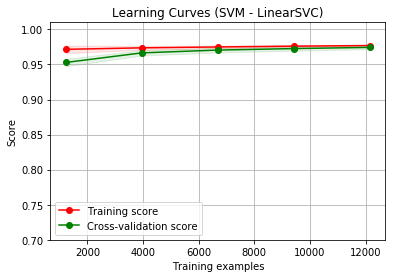

In [37]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (SVM - LinearSVC)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearSVC(C = 100)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

### Feature Importantance - Top Ten Features of SVM - LinearSVC

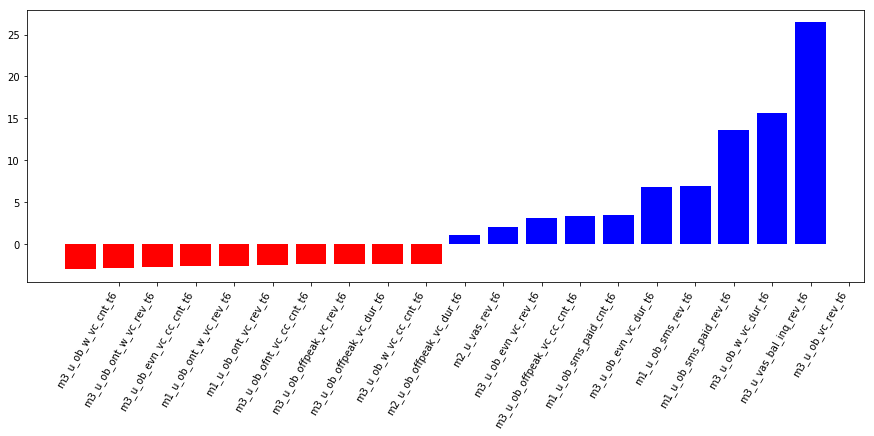

Top positive coefficient features


['m2_u_vas_rev_t6' 'm3_u_ob_evn_vc_rev_t6' 'm3_u_ob_offpeak_vc_cc_cnt_t6'
 'm1_u_ob_sms_paid_cnt_t6' 'm3_u_ob_evn_vc_dur_t6' 'm1_u_ob_sms_rev_t6'
 'm1_u_ob_sms_paid_rev_t6' 'm3_u_ob_w_vc_dur_t6' 'm3_u_vas_bal_inq_rev_t6'
 'm3_u_ob_vc_rev_t6']


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=10):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
 print ("Top positive coefficient features")
 print('\n')
 topimpfeatures = feature_names[top_positive_coefficients]
 print (topimpfeatures)
 
cv = CountVectorizer()
cv.fit(X_train)


svm = LinearSVC(random_state = 101)
svm.fit(X_train, y_train)
plot_coefficients(svm, cv.get_feature_names())

# Final Model - SVM-SVC kernel = "linear" with f-score = 0.97

### Visualising PCA transformed features contours of SVM-SVC kernel = "Linear"

No handles with labels found to put in legend.


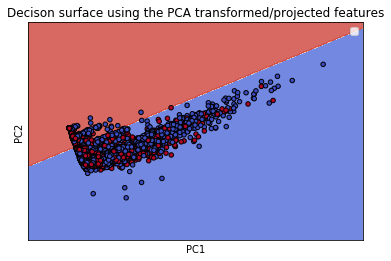

In [28]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA


X = X_train  
y = y_train

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()



## Final Evaluation Report of SVM-SVC - Kernel = "linear"



Fitting - SVM-SVC (kernel='linear')

Test Data - Accuracy
0.9663157894736842

Test Data - Confusion Matrix
[[2106   88]
 [  40 1566]]

Test Data - SSE Matrix
0.03368421052631579


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      2194
          1       0.95      0.98      0.96      1606

avg / total       0.97      0.97      0.97      3800



Variance score: 0.86


=== K-fold Cross Validation - All AUC Scores ===
[0.96975674 0.9756739  0.97370151 0.97435897 0.97171053 0.96513158
 0.97103357 0.96971692 0.96840026 0.98222515]
=== Mean AUC Score ===
Mean K-fold cross validation AUC Score - SVM-SVC - 'Kernel - Linear':  0.9721709134724301



 ROC Curve


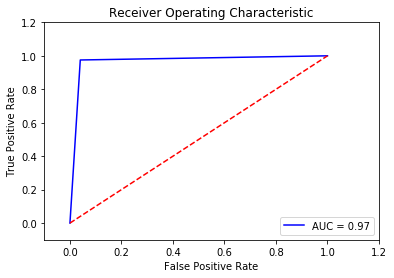

In [20]:
from sklearn.svm import SVC
from sklearn import svm

knight = svm.SVC(kernel='linear', C = 100)
knight.fit(X_train, y_train)
print("\n\nFitting - SVM-SVC (kernel='linear')")

print("\nTest Data - Accuracy")
print(knight.score(X_test, y_test))
print("\nTest Data - Confusion Matrix")
print(metrics.confusion_matrix(y_test, knight.predict(X_test)))
print("\nTest Data - SSE Matrix")
print(mean_squared_error(y_test, knight.predict(X_test)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, knight.predict(X_test)))
print('\n')
print('Variance score: %.2f' % r2_score(y_test, knight.predict(X_test)))

# Model Performance Evaluation; K-fold Cross Validation
knight_cv_score = cross_val_score(knight, X=X_train, y=y_train, cv=10)

print('\n')
print("=== K-fold Cross Validation - All AUC Scores ===")
print(knight_cv_score)
print("=== Mean AUC Score ===")
print("Mean K-fold cross validation AUC Score - SVM-SVC - 'Kernel - Linear': ", knight_cv_score.mean())
print('\n')
print("\n ROC Curve")
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, knight.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



##### The final accuracy achieved after hyperparameter tuning from SVM-SVC Kernel = Linear, is 0.96 with Variance score 0.86 (better than All, so far) with precision 0.98 and f-score 0.97 and ROC score of 0.97

# KNIGHT Predictor

## Predicting Responce in MNP_Scoring 

In [21]:

#reading data
data_test = pd.read_csv("MNP_Scoring.csv")

#data transformation
ids = data_test['U_ID']
data_test = data.drop(columns=["U_ID"])
data_test = data_test[selected_vars]
data_test.info()
pca = PCA()  
data_test = pca.fit_transform(data_test)  


#predicting target responce on test data
predictions = knight.predict(data_test)

#output in csv
output = pd.DataFrame({ 'U_ID' : ids, 'Target_Responce': predictions })
output.to_csv('KNIGHT_MNP_Scoring_Predictions.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Columns: 217 entries, M1_U_OB_DAY_VC_CC_CNT_T6 to M3_GPRS_VOL
dtypes: float64(104), int64(113)
memory usage: 31.5 MB


ValueError: array length 19000 does not match index length 2000